In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt

# Fenômenos ondulatórios

In [2]:
import io
import base64
from IPython.display import HTML

In [3]:
#video = io.open('Waves.mp4', 'r+b').read()
#encoded = base64.b64encode(video)

#HTML(data='''<video alt="test" controls width=800>
#     <source src="data:video/mp4;base64,{0}" type="video/mp4" />
#     </video>'''.format(encoded.decode('ascii')))

## Teorema da amostragem
## $$f(t)=A\cos(\omega t + \phi)$$

<IPython.core.display.Javascript object>


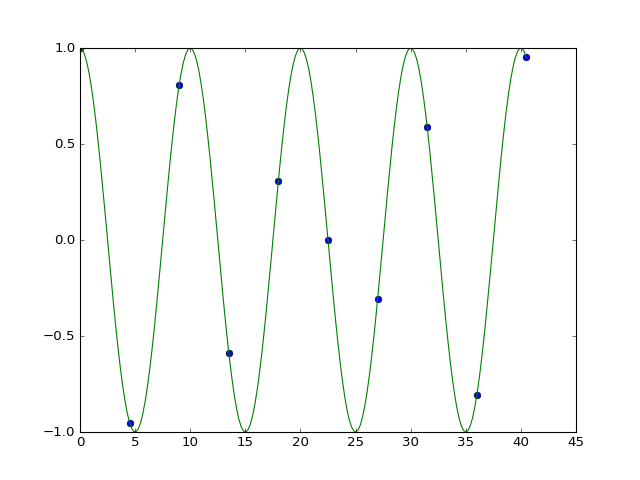

In [166]:
fig, ax = plt.subplots()
dx = 5-0.5
fim = (10-1)*dx
x = np.linspace(0,fim,10)
y = np.cos(2*np.pi*1/10*x)
ax.plot(x,y,'o')

t = np.linspace(0,fim,200)
f = np.cos(2*np.pi*1/10*t)
ax.plot(t,f)

## Um exemplo de sinal que pode ser decomposto em harmônicos
## $$s(t) = \frac{2}{\pi}\sum_{n=1}^\infty \frac{(-1)^{n+1}}{n} \sin(nt)$$

<IPython.core.display.Javascript object>


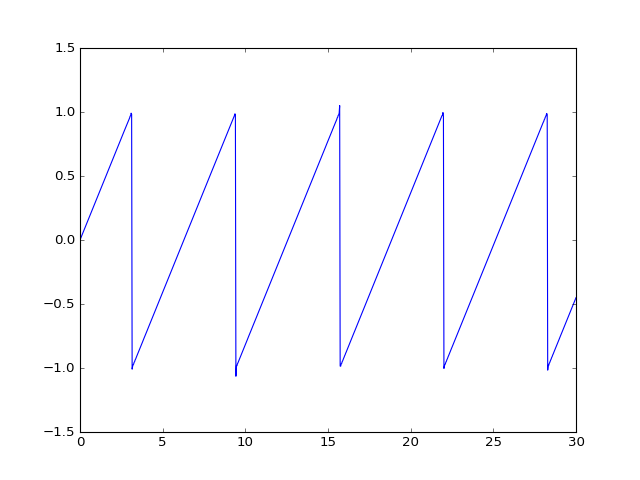

In [174]:
t = np.linspace(0,30,1000)
def series(t,n):
    ssum = 0
    for i in range(1,n+1):
        ssum = ssum+(-1)**(i+1)*np.sin(i*t)/i
    return 2/np.pi*ssum
s = series(t,2000)
fig, ax = plt.subplots()
ax.plot(t,s)

# Transformada de Fourier

# $$f(t)\rightarrow g(\omega)$$
# $$f(x)\rightarrow g(k)$$

# $$g(\omega) =  \int_{-\infty}^{+\infty}f(t)e^{-i\omega t}dt$$
# $$f(t) = \frac{1}{2\pi}\int_{-\infty}^{+\infty}g(\omega)e^{i\omega t}d\omega$$

# Transformada Discreta de Fourier

# $$g(\omega_k) = \sum_{n=1}^Nf(t_n)e^{-i\omega_kt_n}\Delta t$$

<IPython.core.display.Javascript object>


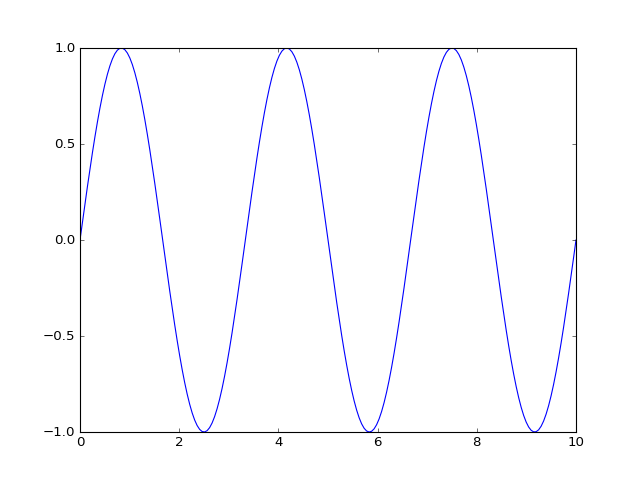

In [175]:
t = np.linspace(0,10,200)
f = np.sin(2*np.pi*3/10*t)
fig, ax = plt.subplots()
ax.plot(t,f)

# $$
W = \left(\begin{array}{c c c c}
e^{-it_1\omega_1} & e^{-it_1\omega_2} & \cdots e^{-it_1\omega_k}\cdots & e^{-it_1\omega_B} \\
e^{-it_2\omega_1} & e^{-it_2\omega_2} & \cdots e^{-it_2\omega_k}\cdots & e^{-it_2\omega_B} \\
\vdots & \vdots & \vdots & \vdots \\
e^{-it_j\omega_1} & e^{-it_j\omega_2} & \cdots e^{-it_j\omega_k}\cdots & e^{-it_2\omega_B} \\
\vdots & \vdots & \vdots & \vdots \\
e^{-it_n\omega_1} & e^{-it_n\omega_2} & \cdots e^{-it_n\omega_k}\cdots & e^{-it_n\omega_B}
\end{array}\right)$$
# $$
g(\omega_k) = \sum_{j=1}^n W_{jk}\cdot f(t_j)
$$

<IPython.core.display.Javascript object>


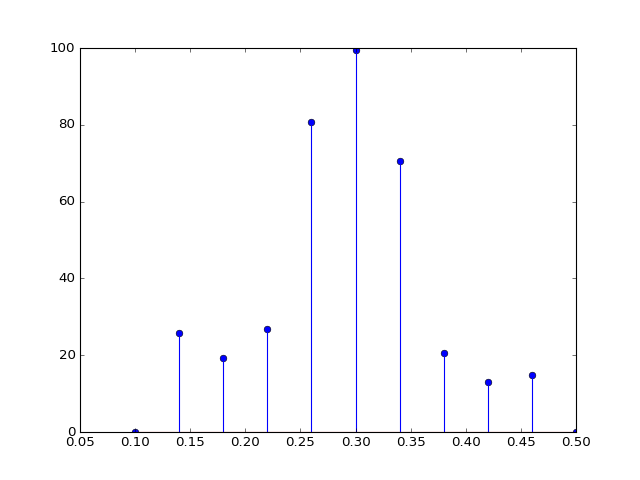

In [177]:
w = 2*np.pi*np.linspace(3/10.-0.2, 3/10.+0.2, 11)
W = np.exp(-1j*np.matrix(w).transpose()*np.matrix(t))
fig, ax = plt.subplots()
ax.stem(w/(2*np.pi),abs(W.dot(f).transpose()))
plt.show()

## Construindo as frequências possíveis
## $$
\Delta \nu = \frac{1}{L}\Rightarrow \Delta\omega=\frac{2\pi}{L}
$$

## $$
\omega = \left\lbrace 0, \Delta\omega, 2\Delta\omega, \cdots, (n-1)\Delta\omega \right\rbrace
$$

In [178]:
def DFT(t,w,f):
    W = np.exp(-1j*np.matrix(w).transpose()*np.matrix(t))
    return abs(W.dot(f).transpose())

In [179]:
n = 50
L = 10.0
dt = L/n
t = np.linspace(0,(n-1)*dt,n)
f = np.sin(2*np.pi*3/10.*t)
dw = 2*np.pi*1/L
w = np.linspace(0,(n-1)*dw,n)

<IPython.core.display.Javascript object>


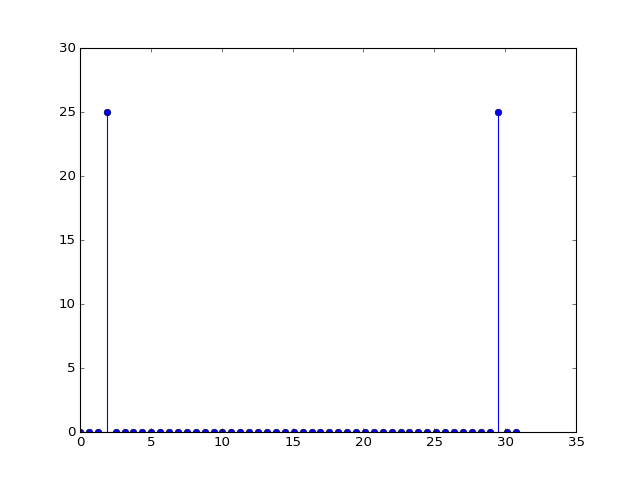

<Container object of 3 artists>

In [180]:
fig, ax = plt.subplots()
ax.stem(w,DFT(t,w,f))

# Transformada de Fourier de uma distribuição normal
# $$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}
$$

In [191]:
n = 100
L = 20.0
dx = L/n
x = np.linspace(-L/2.,(n/2-1)*dx,n)
f = 1/np.sqrt(2*np.pi*3**2)*np.exp(-x*x/(2*3**2))
dk = 2*np.pi*1/L
k = np.linspace(-np.pi/dx/4.,np.pi/dx/4.-dw,n)

<IPython.core.display.Javascript object>


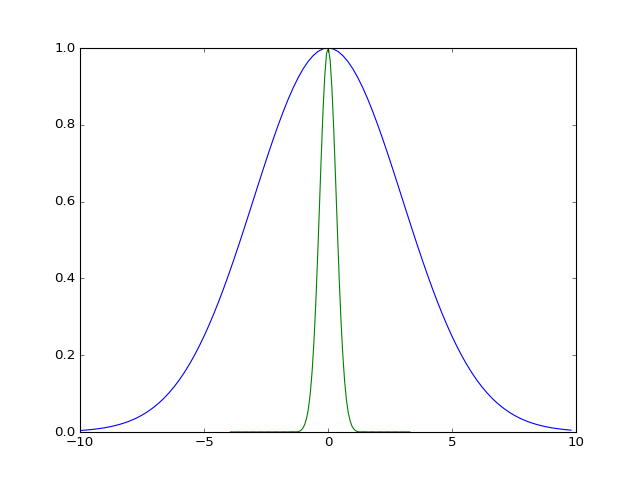

In [193]:
fig, ax = plt.subplots()
ax.plot(x,f/max(f))
g = DFT(x,k,f)
g = np.array(g.T.tolist()[0])
ax.plot(k,g/max(g))

In [194]:
def halfH(x,f):
    ini = 0
    fim = 0
    maxf = max(f)/2.
    aux = 0
    for i in range(len(f)/2):
        if f[i] <= maxf:
            ini = x[i]
        else:
            break
    for i in range(len(f)/2,len(f)):
        if f[i] >= maxf:
            fim = x[i]
        else:
            break
        
    return (fim-ini)/2.0


In [195]:
Dx = halfH(x,f)
Dk = halfH(k,g)
print Dx, Dk, Dx*Dk 


3.5 0.401425727959 1.40499004786


In [2]:
n=5
dt = 2.
dw = 2*np.pi/(n*dt)

In [3]:
w = [-np.pi/dt]
for i in range(n-1):
    w.append(w[0]+(i+1)*dw)

In [4]:
t = [0]
for i in range(n-1):
    t.append(t[0]+(i+1)*dt)

In [5]:
print t
print w

[0, 2.0, 4.0, 6.0, 8.0]
[-1.5707963267948966, -0.9424777960769379, -0.3141592653589793, 0.3141592653589793, 0.9424777960769379]


In [7]:
w

[-1.5707963267948966,
 -0.9424777960769379,
 -0.3141592653589793,
 0.3141592653589793,
 0.9424777960769379]

In [35]:
def expi(x):
    return [np.cos(x),-np.sin(x)]

In [45]:
def criarW(w,t,n):
    W = []
    for k in range(n):
        W.append([])
        for j in range(n):
            W[k].append(expi(w[k]*t[j]))
    return(W)

In [56]:
def Reg(W,f,n):
    g = []
    for k in range(n):
        g.append(0)
        for j in range(n):
            g[k] = g[k]+W[k][j][0]*f[j]
    g = np.array(g)
    return(g)

def Img(W,f,n):
    g = []
    for k in range(n):
        g.append(0)
        for j in range(n):
            g[k] = g[k]+W[k][j][1]*f[j]
    g = np.array(g)
    return(g)

In [10]:
for k in range(n):
    for j in range(n):
        W[k][j] = expi(w[k]*t[j])

In [11]:
for k in range(n):
    for j in range(n):
        print W[k][j], ' ',
    print '\n',

[1.0, 0.0]   [-1.0, 1.2246467991473532e-16]   [1.0, -2.4492935982947064e-16]   [-1.0, 3.6739403974420594e-16]   [1.0, -4.8985871965894128e-16]   
[1.0, 0.0]   [-0.30901699437494734, 0.95105651629515364]   [-0.80901699437494745, -0.58778525229247303]   [0.80901699437494734, -0.58778525229247336]   [0.30901699437494773, 0.95105651629515353]   
[1.0, 0.0]   [0.80901699437494745, 0.58778525229247314]   [0.30901699437494745, 0.95105651629515353]   [-0.30901699437494734, 0.95105651629515364]   [-0.80901699437494734, 0.58778525229247325]   
[1.0, -0.0]   [0.80901699437494745, -0.58778525229247314]   [0.30901699437494745, -0.95105651629515353]   [-0.30901699437494734, -0.95105651629515364]   [-0.80901699437494734, -0.58778525229247325]   
[1.0, -0.0]   [-0.30901699437494734, -0.95105651629515364]   [-0.80901699437494745, 0.58778525229247303]   [0.80901699437494734, 0.58778525229247336]   [0.30901699437494773, -0.95105651629515353]   


In [97]:
# Construindo uma função para testar a transformada
n = 1000
t = np.linspace(0,10,n)
dt = t[1]-t[0]
dw = 2*np.pi/10.
w = np.linspace(-np.pi/dt,np.pi/dt-dw,n)
#y = np.sin(2*np.pi*3/10.*t)+np.cos(2*np.pi*4/10.*t)
x = np.linspace(-5,5,n)
dx = x[1]-x[0]
dw = 2*np.pi/10.
w = np.linspace(-np.pi/dx,np.pi/dx-dw,n)
y = 1/np.sqrt(2*np.pi)*np.exp(-x*x)

In [67]:
3/10.

0.3

In [98]:
%%time
W = criarW(w,t,n)

Wall time: 3.04 s


<IPython.core.display.Javascript object>


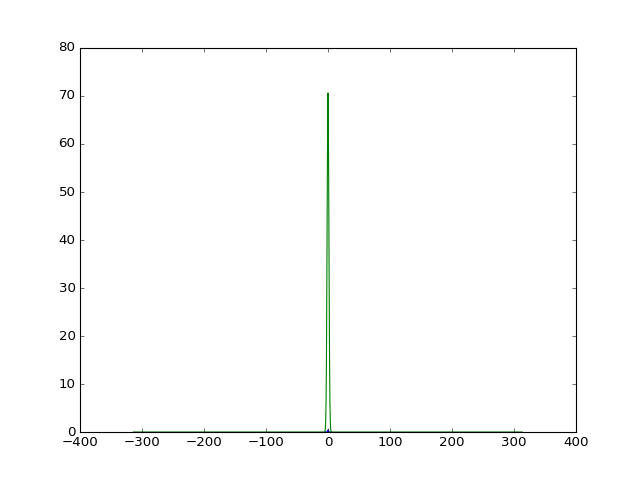

In [102]:
plt.plot(x,y)

<IPython.core.display.Javascript object>


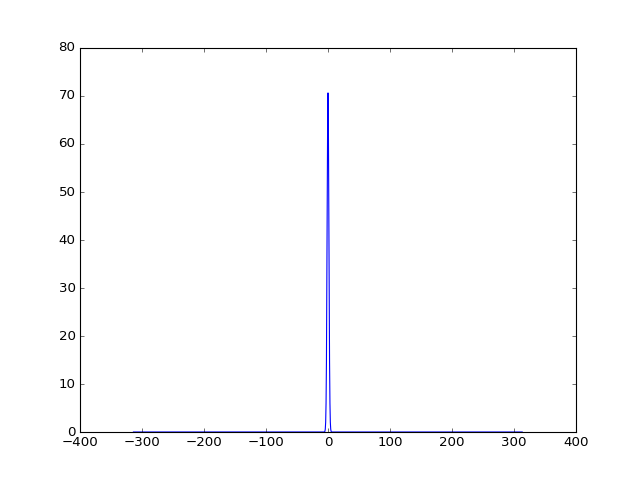

Wall time: 1.02 s


In [104]:
%%time
gr = Reg(W,y,n)
gi = Img(W,y,n)
#plt.plot(x,y)
plt.plot(w,np.sqrt(gr*gr+gi*gi))

0.41666666666666669

In [39]:
25*(t[1]-t[0])

10.416666666666668